In [68]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_feature_engineered.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65907 entries, 0 to 65906
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          65907 non-null  int64  
 1   circle              65907 non-null  object 
 2   type_of_connection  65907 non-null  object 
 3   year                65907 non-null  int64  
 4   month               65907 non-null  object 
 5   service_provider    65907 non-null  object 
 6   value               65907 non-null  int64  
 7   technology          65907 non-null  object 
 8   tech_yearly_sum     65907 non-null  int64  
 9   tech_avg            65907 non-null  float64
 10  tech_value_diff     65907 non-null  float64
 11  tech_yearly_share   65907 non-null  float64
 12  technology_missing  65907 non-null  int64  
 13  value_lag1          65907 non-null  float64
 14  value_lag2          65907 non-null  float64
dtypes: float64(5), int64(5), object(5)
memory usage: 7.5+

In [70]:
df.columns

Index(['Unnamed: 0', 'circle', 'type_of_connection', 'year', 'month',
       'service_provider', 'value', 'technology', 'tech_yearly_sum',
       'tech_avg', 'tech_value_diff', 'tech_yearly_share',
       'technology_missing', 'value_lag1', 'value_lag2'],
      dtype='object')

In [71]:
df = df.drop(columns = 'Unnamed: 0')

In [72]:
df = df.sort_values(by=['technology', 'circle', 'service_provider', 'year', 'month'])

In [73]:
df = df.drop_duplicates()

In [74]:
df['technology'].unique()

array(['3G', '4G', '5G'], dtype=object)

In [75]:
df.tail()

,circle,type_of_connection,year,month,service_provider,value,technology,tech_yearly_sum,tech_avg,tech_value_diff,tech_yearly_share,technology_missing,value_lag1,value_lag2
65902,West Bengal,wireline,2025,February,Vodafone-Idea,150,5G,4347862126,9.005452e+06,-284090.0,3.449971e-08,0,11722068.0,150.0
65903,West Bengal,wireless,2025,January,Vodafone-Idea,11742282,5G,4347862126,9.005452e+06,-12387806.0,2.700702e-03,0,150.0,11722068.0
65904,West Bengal,wireline,2025,January,Vodafone-Idea,150,5G,4347862126,9.005452e+06,-279230.0,3.449971e-08,0,11742282.0,150.0
65905,West Bengal,wireless,2025,March,Vodafone-Idea,11620668,5G,4347862126,9.005452e+06,-12774587.0,2.672731e-03,0,150.0,11742282.0
65906,West Bengal,wireline,2025,March,Vodafone-Idea,150,5G,4347862126,9.005452e+06,-290657.0,3.449971e-08,0,11620668.0,150.0


In [76]:
df = df.drop(columns = ['type_of_connection'])
# cause all technologies 2g, 3g, 4g , 5g are of type 'wireless'

In [77]:
df.isnull().sum()

circle                0
year                  0
month                 0
service_provider      0
value                 0
technology            0
tech_yearly_sum       0
tech_avg              0
tech_value_diff       0
tech_yearly_share     0
technology_missing    0
value_lag1            0
value_lag2            0
dtype: int64

In [78]:
# change in sub value to identify churn
df['churn_change'] = df.groupby(['technology', 'circle', 'service_provider'])['value'].diff().fillna(0)

# churn column creation
df['churn'] = np.where(df['churn_change'] < 0, 1, 0)
df['churn'] = df['churn'].fillna(0)

In [79]:
df[['year', 'month', 'technology', 'circle', 'service_provider', 'value', 'churn_change', 'churn']].head(20)

,year,month,technology,circle,service_provider,value,churn_change,churn
0,2009,April,3G,Andaman and Nicobar Islands,Aircel,852468,0.0,0
1,2009,February,3G,Andaman and Nicobar Islands,Aircel,852468,0.0,0
2,2009,January,3G,Andaman and Nicobar Islands,Aircel,852468,0.0,0
3,2009,March,3G,Andaman and Nicobar Islands,Aircel,852468,0.0,0
4,2009,May,3G,Andaman and Nicobar Islands,Aircel,852468,0.0,0
5,2009,April,3G,Andaman and Nicobar Islands,Airtel,852468,0.0,0
6,2009,February,3G,Andaman and Nicobar Islands,Airtel,852468,0.0,0
7,2009,January,3G,Andaman and Nicobar Islands,Airtel,852468,0.0,0
8,2009,March,3G,Andaman and Nicobar Islands,Airtel,852468,0.0,0
9,2009,May,3G,Andaman and Nicobar Islands,Airtel,852468,0.0,0


Correlation Analysis : Correlation analysis checks how strongly numeric features are related to each other.
tells how one variable changes when other variable changes.
it measures the strength and direction of a linear relationship between two variables.

In [80]:
# Finding Correlation by building correlation matrix

corr = df.corr(numeric_only = True) #makes consider numerical columns only
print(corr)

                        year     value  tech_yearly_sum  tech_avg  \
year                1.000000  0.155899        -0.091694  0.624287   
value               0.155899  1.000000         0.193447  0.287809   
tech_yearly_sum    -0.091694  0.193447         1.000000  0.125910   
tech_avg            0.624287  0.287809         0.125910  1.000000   
tech_value_diff    -0.000088  0.548468        -0.000044 -0.000250   
tech_yearly_share   0.191521  0.659159        -0.159738  0.188060   
technology_missing       NaN       NaN              NaN       NaN   
value_lag1          0.159355  0.100034         0.194781  0.288500   
value_lag2          0.160175  0.800834         0.194667  0.282944   
churn_change       -0.003296  0.665247        -0.001993 -0.006670   
churn               0.060541 -0.247155         0.042689  0.065796   

                    tech_value_diff  tech_yearly_share  technology_missing  \
year                      -0.000088           0.191521                 NaN   
value          

In [82]:
df['year'].corr(df['tech_avg'], method='pearson')

np.float64(0.6242867832410319)

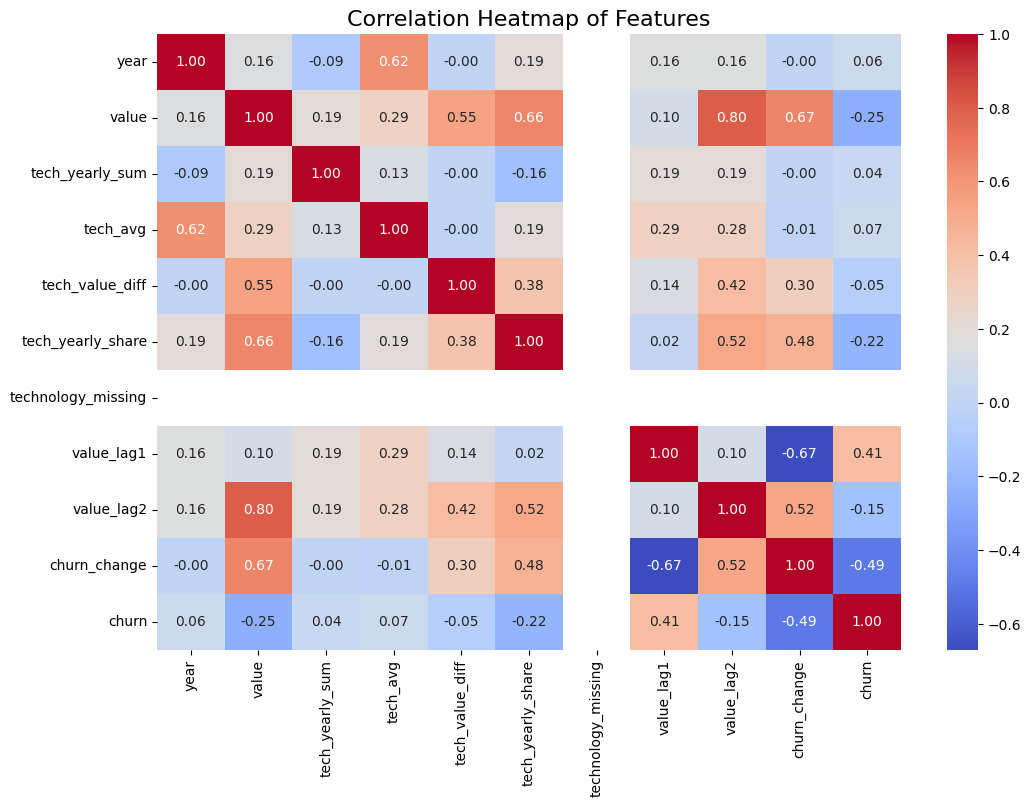

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

In [84]:
high_corr = (corr.abs() > 0.85) & (corr.abs() < 1.0)
high_corr_pairs = [(corr.columns[i], corr.columns[j], corr.iloc[i, j])
                    for i in range(len(corr.columns))
                    for j in range(i)
                    if high_corr.iloc[i, j]]

print(" Highly correlated feature pairs (>0.85):")
for f1, f2, val in high_corr_pairs:
    print(f"{f1} ↔ {f2} = {val:.3f}")

 Highly correlated feature pairs (>0.85):


In [85]:
df.columns

Index(['circle', 'year', 'month', 'service_provider', 'value', 'technology',
       'tech_yearly_sum', 'tech_avg', 'tech_value_diff', 'tech_yearly_share',
       'technology_missing', 'value_lag1', 'value_lag2', 'churn_change',
       'churn'],
      dtype='object')

In [86]:
df.tail()

,circle,year,month,service_provider,value,technology,tech_yearly_sum,tech_avg,tech_value_diff,tech_yearly_share,technology_missing,value_lag1,value_lag2,churn_change,churn
65902,West Bengal,2025,February,Vodafone-Idea,150,5G,4347862126,9.005452e+06,-284090.0,3.449971e-08,0,11722068.0,150.0,-11721918.0,1
65903,West Bengal,2025,January,Vodafone-Idea,11742282,5G,4347862126,9.005452e+06,-12387806.0,2.700702e-03,0,150.0,11722068.0,11742132.0,0
65904,West Bengal,2025,January,Vodafone-Idea,150,5G,4347862126,9.005452e+06,-279230.0,3.449971e-08,0,11742282.0,150.0,-11742132.0,1
65905,West Bengal,2025,March,Vodafone-Idea,11620668,5G,4347862126,9.005452e+06,-12774587.0,2.672731e-03,0,150.0,11742282.0,11620518.0,0
65906,West Bengal,2025,March,Vodafone-Idea,150,5G,4347862126,9.005452e+06,-290657.0,3.449971e-08,0,11620668.0,150.0,-11620518.0,1


In [87]:
df.to_csv("telecom_feature_selected.csv")